# Convert Lunar Image to Binary Mask

## Import Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Necessary Libraries

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 15.5 MB/s eta 0:00:00


## Import Libraries

In [3]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Load Trained YOLOv8 model

In [4]:
model = YOLO("/content/drive/My Drive/best_yolo.pt")

## Convert Lunae Image to Binary Mask

In [5]:
def get_safe_zone(image_path):
    image = cv2.imread(image_path)
    results = model(image)

    mask = np.ones(image.shape[:2], dtype=np.uint8) * 255  # White = Safe

    for r in results:
        for box in r.boxes.xyxy:  # Bounding box [x1, y1, x2, y2]
            x1, y1, x2, y2 = map(int, box.tolist())
            mask[y1:y2, x1:x2] = 0  # Mark craters/boulders as black (unsafe)

    return mask  # Binary mask (White = Safe, Black = Unsafe)

## Load Original Image

In [6]:
image_path = "/content/drive/My Drive/Lunar.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct visualization

## Generate Mask

In [7]:
mask = get_safe_zone(image_path)
cv2.imwrite("/content/drive/My Drive/Mask.jpg", mask) # Save the mask


0: 800x800 140 0s, 287.7ms
Speed: 5.8ms preprocess, 287.7ms inference, 1.8ms postprocess per image at shape (1, 3, 800, 800)


True

## Display Lunar Image and Binary Mask

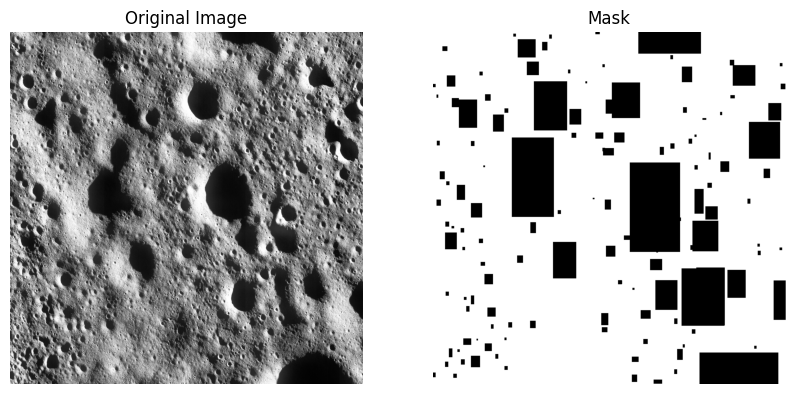

In [8]:
# Plot the figure
plt.figure(figsize=(10, 5))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Show mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")  # Use grayscale colormap for masks
plt.title("Mask")
plt.axis("off")

# Display
plt.show()